In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df_scarpe = pd.read_csv('vans_converse_completo.csv')
df_scarpe

,marca,categoria,nome_prodotto,prezzo_effettivo,prezzo_ordinario
0,VANS,Sneakers alte da uomo,MID SKOOL 37 UNISEX - Sneakers alte - cement b...,"62,99","89,99"
1,VANS,Sneakers alte da uomo,SK8-HI UNISEX - Sneakers alte - black/white,"66,49","94,99"
2,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR HI - Sneakers alte - black,"66,99","74,99"
3,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR UNISEX - Sneakers alte -...,"44,99","74,99"
4,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR HI - Sneakers alte - maroon,"59,99","74,99"
...,...,...,...,...,...
1938,VANS,Stivali da donna,MTE SK8-HI WATERPROOF UNISEX - Stivali da neve...,"87,99","159,99"
1939,VANS,Stivali da donna,MTE SK8-HI WATERPROOF UNISEX - Stivali da neve...,"79,99","159,99"
1940,VANS,Stivali da donna,MTE SK8-HI WATERPROOF UNISEX - Stivali da neve...,"87,99","159,99"
1941,VANS,Stivali da donna,MTE SK8-HI WATERPROOF UNISEX - Stivali da neve...,"103,99","159,99"


In [4]:
df_scarpe.info() #le colonne prezzo vanno cambiate in float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943 entries, 0 to 1942
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   marca             1943 non-null   object
 1   categoria         1943 non-null   object
 2   nome_prodotto     1943 non-null   object
 3   prezzo_effettivo  1943 non-null   object
 4   prezzo_ordinario  1943 non-null   object
dtypes: object(5)
memory usage: 76.0+ KB


In [5]:
a = df_scarpe.loc[df_scarpe['prezzo_effettivo'].str.contains('tagl', regex=False)]
df_scarpe = df_scarpe.drop(a.index)
df_scarpe.count()#ho eliminato le righe che non mi servivano

marca               1936
categoria           1936
nome_prodotto       1936
prezzo_effettivo    1936
prezzo_ordinario    1936
dtype: int64

In [6]:
df_scarpe['prezzo_effettivo'] = df_scarpe['prezzo_effettivo'].str.replace(',', '.')
df_scarpe['prezzo_ordinario'] = df_scarpe['prezzo_ordinario'].str.replace(',', '.')
df_scarpe.head()

,marca,categoria,nome_prodotto,prezzo_effettivo,prezzo_ordinario
0,VANS,Sneakers alte da uomo,MID SKOOL 37 UNISEX - Sneakers alte - cement b...,62.99,89.99
1,VANS,Sneakers alte da uomo,SK8-HI UNISEX - Sneakers alte - black/white,66.49,94.99
2,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR HI - Sneakers alte - black,66.99,74.99
3,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR UNISEX - Sneakers alte -...,44.99,74.99
4,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR HI - Sneakers alte - maroon,59.99,74.99


In [7]:
df_scarpe['prezzo_effettivo'] = df_scarpe['prezzo_effettivo'].astype(float)
df_scarpe['prezzo_ordinario'] = df_scarpe['prezzo_ordinario'].astype(float)
df_scarpe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1936 entries, 0 to 1942
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             1936 non-null   object 
 1   categoria         1936 non-null   object 
 2   nome_prodotto     1936 non-null   object 
 3   prezzo_effettivo  1936 non-null   float64
 4   prezzo_ordinario  1936 non-null   float64
dtypes: float64(2), object(3)
memory usage: 90.8+ KB


In [8]:
df_scarpe[['modello', 'tipo', 'colore']] = df_scarpe['nome_prodotto'].str.split(' - ', expand=True)
df_scarpe

,marca,categoria,nome_prodotto,prezzo_effettivo,prezzo_ordinario,modello,tipo,colore
0,VANS,Sneakers alte da uomo,MID SKOOL 37 UNISEX - Sneakers alte - cement b...,62.99,89.99,MID SKOOL 37 UNISEX,Sneakers alte,cement blue/impala
1,VANS,Sneakers alte da uomo,SK8-HI UNISEX - Sneakers alte - black/white,66.49,94.99,SK8-HI UNISEX,Sneakers alte,black/white
2,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR HI - Sneakers alte - black,66.99,74.99,CHUCK TAYLOR ALL STAR HI,Sneakers alte,black
3,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR UNISEX - Sneakers alte -...,44.99,74.99,CHUCK TAYLOR ALL STAR UNISEX,Sneakers alte,stingray grey
4,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR HI - Sneakers alte - maroon,59.99,74.99,CHUCK TAYLOR ALL STAR HI,Sneakers alte,maroon
...,...,...,...,...,...,...,...,...
1938,VANS,Stivali da donna,MTE SK8-HI WATERPROOF UNISEX - Stivali da neve...,87.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,glazed ginger
1939,VANS,Stivali da donna,MTE SK8-HI WATERPROOF UNISEX - Stivali da neve...,79.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,black
1940,VANS,Stivali da donna,MTE SK8-HI WATERPROOF UNISEX - Stivali da neve...,87.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,teak
1941,VANS,Stivali da donna,MTE SK8-HI WATERPROOF UNISEX - Stivali da neve...,103.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,scarab/black


In [9]:
df_scarpe['gender'] = df_scarpe['categoria'].str.split('da').str[1]
df_scarpe.head()

,marca,categoria,nome_prodotto,prezzo_effettivo,prezzo_ordinario,modello,tipo,colore,gender
0,VANS,Sneakers alte da uomo,MID SKOOL 37 UNISEX - Sneakers alte - cement b...,62.99,89.99,MID SKOOL 37 UNISEX,Sneakers alte,cement blue/impala,uomo
1,VANS,Sneakers alte da uomo,SK8-HI UNISEX - Sneakers alte - black/white,66.49,94.99,SK8-HI UNISEX,Sneakers alte,black/white,uomo
2,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR HI - Sneakers alte - black,66.99,74.99,CHUCK TAYLOR ALL STAR HI,Sneakers alte,black,uomo
3,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR UNISEX - Sneakers alte -...,44.99,74.99,CHUCK TAYLOR ALL STAR UNISEX,Sneakers alte,stingray grey,uomo
4,CONVERSE,Sneakers alte da uomo,CHUCK TAYLOR ALL STAR HI - Sneakers alte - maroon,59.99,74.99,CHUCK TAYLOR ALL STAR HI,Sneakers alte,maroon,uomo


In [10]:
#df_scarpe = df_scarpe.drop(columns=['categoria'])
df_scarpe = df_scarpe.drop(columns=['nome_prodotto'])
df_scarpe.head()

,marca,categoria,prezzo_effettivo,prezzo_ordinario,modello,tipo,colore,gender
0,VANS,Sneakers alte da uomo,62.99,89.99,MID SKOOL 37 UNISEX,Sneakers alte,cement blue/impala,uomo
1,VANS,Sneakers alte da uomo,66.49,94.99,SK8-HI UNISEX,Sneakers alte,black/white,uomo
2,CONVERSE,Sneakers alte da uomo,66.99,74.99,CHUCK TAYLOR ALL STAR HI,Sneakers alte,black,uomo
3,CONVERSE,Sneakers alte da uomo,44.99,74.99,CHUCK TAYLOR ALL STAR UNISEX,Sneakers alte,stingray grey,uomo
4,CONVERSE,Sneakers alte da uomo,59.99,74.99,CHUCK TAYLOR ALL STAR HI,Sneakers alte,maroon,uomo


In [11]:
for index, row in df_scarpe.iterrows():
    if 'unisex' in row['modello'].lower():
        df_scarpe.at[index, 'gender'] = 'unisex'

df_scarpe

,marca,categoria,prezzo_effettivo,prezzo_ordinario,modello,tipo,colore,gender
0,VANS,Sneakers alte da uomo,62.99,89.99,MID SKOOL 37 UNISEX,Sneakers alte,cement blue/impala,unisex
1,VANS,Sneakers alte da uomo,66.49,94.99,SK8-HI UNISEX,Sneakers alte,black/white,unisex
2,CONVERSE,Sneakers alte da uomo,66.99,74.99,CHUCK TAYLOR ALL STAR HI,Sneakers alte,black,uomo
3,CONVERSE,Sneakers alte da uomo,44.99,74.99,CHUCK TAYLOR ALL STAR UNISEX,Sneakers alte,stingray grey,unisex
4,CONVERSE,Sneakers alte da uomo,59.99,74.99,CHUCK TAYLOR ALL STAR HI,Sneakers alte,maroon,uomo
...,...,...,...,...,...,...,...,...
1938,VANS,Stivali da donna,87.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,glazed ginger,unisex
1939,VANS,Stivali da donna,79.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,black,unisex
1940,VANS,Stivali da donna,87.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,teak,unisex
1941,VANS,Stivali da donna,103.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,scarab/black,unisex


In [12]:
df_scarpe = df_scarpe.drop(columns=['categoria'])
df_scarpe

,marca,prezzo_effettivo,prezzo_ordinario,modello,tipo,colore,gender
0,VANS,62.99,89.99,MID SKOOL 37 UNISEX,Sneakers alte,cement blue/impala,unisex
1,VANS,66.49,94.99,SK8-HI UNISEX,Sneakers alte,black/white,unisex
2,CONVERSE,66.99,74.99,CHUCK TAYLOR ALL STAR HI,Sneakers alte,black,uomo
3,CONVERSE,44.99,74.99,CHUCK TAYLOR ALL STAR UNISEX,Sneakers alte,stingray grey,unisex
4,CONVERSE,59.99,74.99,CHUCK TAYLOR ALL STAR HI,Sneakers alte,maroon,uomo
...,...,...,...,...,...,...,...
1938,VANS,87.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,glazed ginger,unisex
1939,VANS,79.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,black,unisex
1940,VANS,87.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,teak,unisex
1941,VANS,103.99,159.99,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,scarab/black,unisex


In [13]:
df_scarpe = df_scarpe[['marca','modello','tipo','colore','gender','prezzo_effettivo','prezzo_ordinario']]
df_scarpe

,marca,modello,tipo,colore,gender,prezzo_effettivo,prezzo_ordinario
0,VANS,MID SKOOL 37 UNISEX,Sneakers alte,cement blue/impala,unisex,62.99,89.99
1,VANS,SK8-HI UNISEX,Sneakers alte,black/white,unisex,66.49,94.99
2,CONVERSE,CHUCK TAYLOR ALL STAR HI,Sneakers alte,black,uomo,66.99,74.99
3,CONVERSE,CHUCK TAYLOR ALL STAR UNISEX,Sneakers alte,stingray grey,unisex,44.99,74.99
4,CONVERSE,CHUCK TAYLOR ALL STAR HI,Sneakers alte,maroon,uomo,59.99,74.99
...,...,...,...,...,...,...,...
1938,VANS,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,glazed ginger,unisex,87.99,159.99
1939,VANS,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,black,unisex,79.99,159.99
1940,VANS,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,teak,unisex,87.99,159.99
1941,VANS,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,scarab/black,unisex,103.99,159.99


In [14]:
df_scarpe.describe()

,prezzo_effettivo,prezzo_ordinario
count,1936.000000,1936.000000
mean,73.597087,97.257397
std,23.977286,22.527756
min,36.990000,37.000000
25%,54.990000,84.990000
50%,67.990000,90.000000
75%,85.990000,104.500000
max,189.000000,249.990000


In [15]:
duplicati = df_scarpe.duplicated()
duplicati.sum()
df_duplicati = df_scarpe[df_scarpe.duplicated()]
df_duplicati.shape[0]

597

In [16]:
# elimino i duplicati perchè potrebbe falsare i dati
df_scarpe_new = df_scarpe.drop_duplicates()
df_scarpe_new.sample()

,marca,modello,tipo,colore,gender,prezzo_effettivo,prezzo_ordinario
1863,VANS,HYLANE,Scarpe skate,atmosphere,donna,70.0,100.0


In [17]:
df_scarpe_new = df_scarpe_new.rename(columns={"tipo": "categoria"})

In [18]:
df_scarpe_new

,marca,modello,categoria,colore,gender,prezzo_effettivo,prezzo_ordinario
0,VANS,MID SKOOL 37 UNISEX,Sneakers alte,cement blue/impala,unisex,62.99,89.99
1,VANS,SK8-HI UNISEX,Sneakers alte,black/white,unisex,66.49,94.99
2,CONVERSE,CHUCK TAYLOR ALL STAR HI,Sneakers alte,black,uomo,66.99,74.99
3,CONVERSE,CHUCK TAYLOR ALL STAR UNISEX,Sneakers alte,stingray grey,unisex,44.99,74.99
4,CONVERSE,CHUCK TAYLOR ALL STAR HI,Sneakers alte,maroon,uomo,59.99,74.99
...,...,...,...,...,...,...,...
1928,CONVERSE,CHUCK TAYLOR ALL STAR LUGGED 2.0,Stivaletti con plateau,black/sharkskin,donna,76.99,139.99
1931,CONVERSE,CHUCK TAYLOR ALL STAR XXHI,Stivali con i lacci,black,donna,99.99,99.99
1936,CONVERSE,CHUCK TAYLOR ALL STAR LUGGED 2.0 WATERPROOF PL...,Stivali da neve,fresh brew/fresh brew/black,donna,69.99,139.99
1941,VANS,MTE SK8-HI WATERPROOF UNISEX,Stivali da neve,scarab/black,unisex,103.99,159.99


In [19]:
sneacker_alte = df_scarpe_new.groupby("categoria")["modello"].count()
sneacker_alte

categoria
Scarpe senza lacci             23
Scarpe skate                  139
Sneakers alte                 474
Sneakers basse                648
Stivaletti con plateau          5
Stivaletti con tacco            2
Stivaletti stringati            4
Stivali con i lacci             1
Stivali da neve                 9
Stringate sportive              4
Tronchetti                      2
beige                           1
black                           4
black / white                   1
black off white                 1
black/true white                2
brown                           2
charcoal                        2
fairway                         2
glazed ginger                   2
lime                            2
pink bubblegum black white      1
pink grey                       1
port royale/true white          2
purple                          1
schwarz                         1
turtledove                      2
white                           1
Name: modello, dtype: int64

In [20]:
df_scarpe_new["categoria"].unique()

array(['Sneakers alte', 'beige', 'Scarpe skate',
       'pink bubblegum black white', 'black', 'Sneakers basse',
       'port royale/true white', 'Scarpe senza lacci', 'black/true white',
       'glazed ginger', 'turtledove', 'charcoal', 'brown', 'lime',
       'fairway', 'black / white', 'Stivali da neve ',
       'Stivaletti con plateau', 'Stivaletti stringati',
       'Stringate sportive', 'pink grey', 'purple', 'black off white',
       'schwarz', 'white', 'Stivaletti con tacco', 'Tronchetti',
       'Stivali con i lacci'], dtype=object)

In [21]:
# Ci siamo accorti che nello split alcuni colori erano subentrati nella categoria, quindi, con queste righe di codice li abbiamo spostate
df_scarpe_new.loc[df_scarpe_new['colore'].isnull(), 'colore'] = df_scarpe_new['categoria']
df_scarpe_new.loc[df_scarpe_new['colore'] == df_scarpe_new['categoria'], 'categoria'] = None


df_scarpe_new["modello"].unique()

array(['MID SKOOL 37 UNISEX', 'SK8-HI UNISEX', 'CHUCK TAYLOR ALL STAR HI',
       'CHUCK TAYLOR ALL STAR UNISEX',
       'CHUCK TAYLOR ALL STAR CLASSIC WIDE',
       'CHUCK TAYLOR ALL STAR MALDEN STREET UNISEX', 'CHUCK 70',
       'RUN STAR HIKE', 'SK8 HI UNISEX', 'CHUCK TAYLOR ALL STAR HI ',
       'CHUCK TAYLOR ALL STAR CITY TREK', 'CHUCK TAYLOR UNISEX',
       'SK8 HI TAPERED', 'CHUCK TAYLOR ALL STAR MALDEN STREET',
       'STAR PLAYER 76 UNISEX', 'CHUCK TAYLOR ALL STAR CITY TREK UNISEX',
       'CHUCK UNISEX', 'CHUCK 70 UNISEX',
       'CHUCK TAYLOR ALL STAR WIDE UNISEX',
       'CHUCK TAYLOR ALL STAR WIDE FIT ', 'PRO BLAZE CLASSIC UNISEX',
       'CHUCK 70 FUTURE COMFORT UNISEX',
       'CHUCK TAYLOR ALL STAR CLASSIC UNISEX',
       'CHUCK TAYLOR ALL STAR LTD UNISEX', 'Sneakers alte',
       'CHUCK GEO FORMA', 'MTE SK8-HI WATERPROOF UNISEX',
       'CHUCK 70 PLUS XHI', 'OLD SKOOL WIDE', 'KNU MID UNISEX',
       'MTE CROSSPATH MID ', 'WEAPON VINTAGE UNISEX',
       'CHUCK TAYLOR AL

In [22]:
df_sneakers = df_scarpe_new.loc[df_scarpe_new["categoria"].isin(["Sneakers alte","Sneakers basse"])]

In [23]:
df_altre_categorie = df_scarpe_new.loc[~df_scarpe_new["categoria"].isin(["Sneakers alte","Sneakers basse","Scarpe skate"])]

In [24]:
df_skate = df_scarpe_new.loc[df_scarpe_new["categoria"].isin(["Scarpe skate"])]

C:\Users\ferro\AppData\Local\Temp\ipykernel_6060\888136488.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_scarpe_new, x="categoria", palette = palette)
C:\Users\ferro\AppData\Local\Temp\ipykernel_6060\888136488.py:3: UserWarning: 
The palette list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data = df_scarpe_new, x="categoria", palette = palette)


inserisci il percorso per il salvataggio: C:\Users\ferro\Desktop\es. epicode\Modulo 3 PHYTON\bw12\GRAFICI


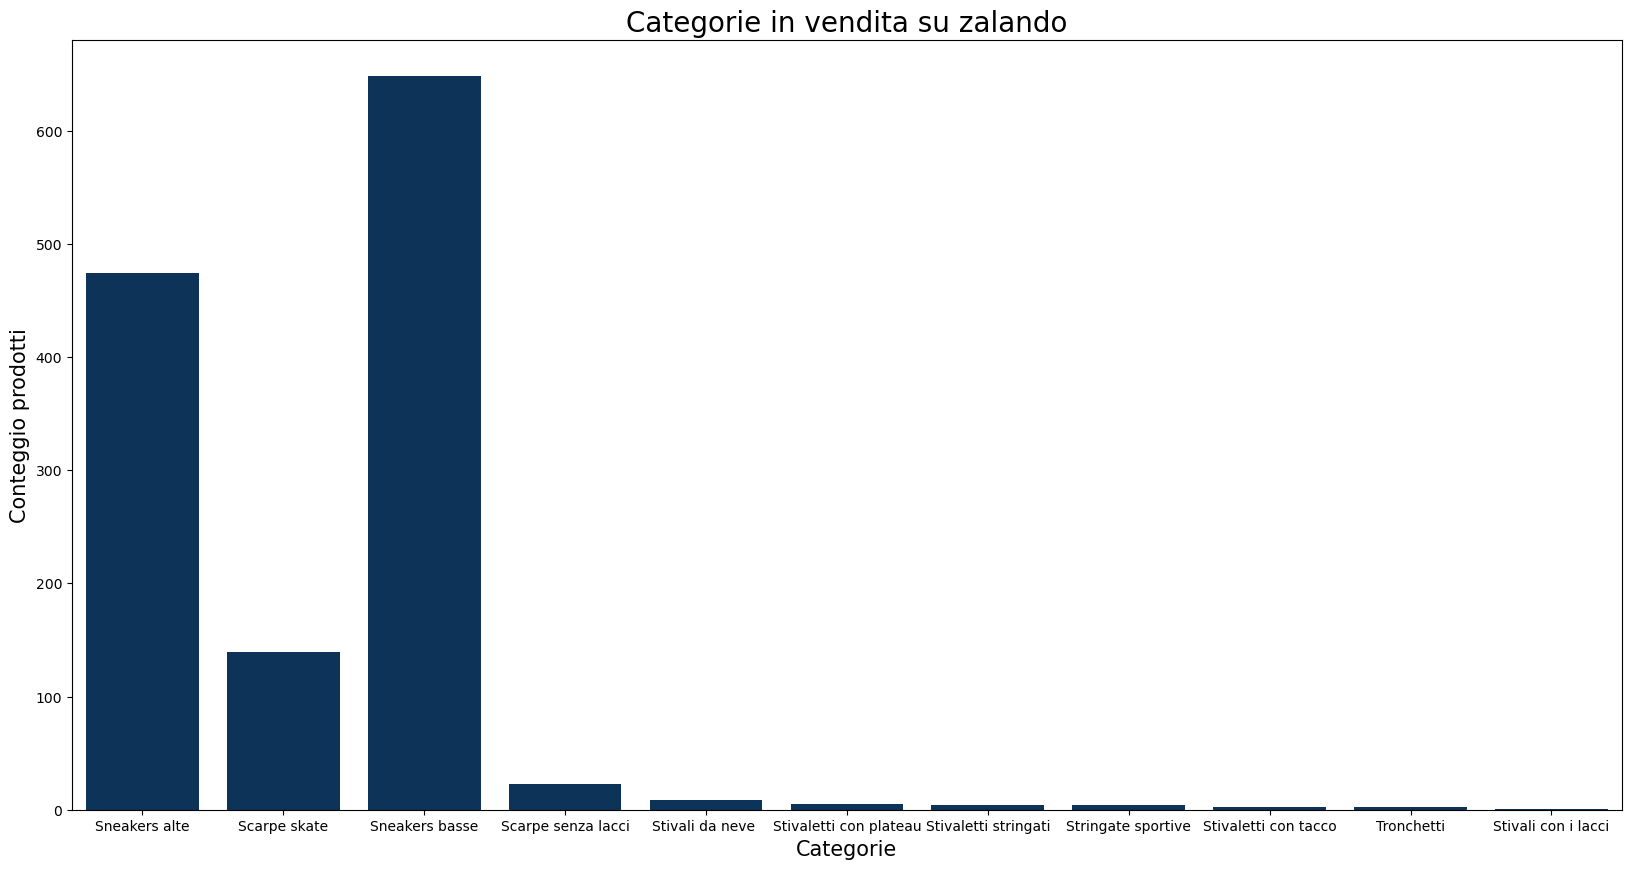

In [166]:
palette = ["#003366"]
plt.figure(figsize=(20,10))
sns.countplot(data = df_scarpe_new, x="categoria", palette = palette)
plt.title("Categorie in vendita su zalando",fontsize = 20)
plt.xlabel("Categorie", fontsize = 15)
plt.ylabel("Conteggio prodotti", fontsize = 15)
Grafico_altre_categorie = input(f'inserisci il percorso per il salvataggio:')
os.makedirs(Grafico_altre_categorie, exist_ok=True)
plt.savefig(Grafico_altre_categorie + '/Categorie.png', dpi=300, bbox_inches='tight')

inserisci il percorso per il salvataggio: C:\Users\ferro\Desktop\es. epicode\Modulo 3 PHYTON\bw12\GRAFICI


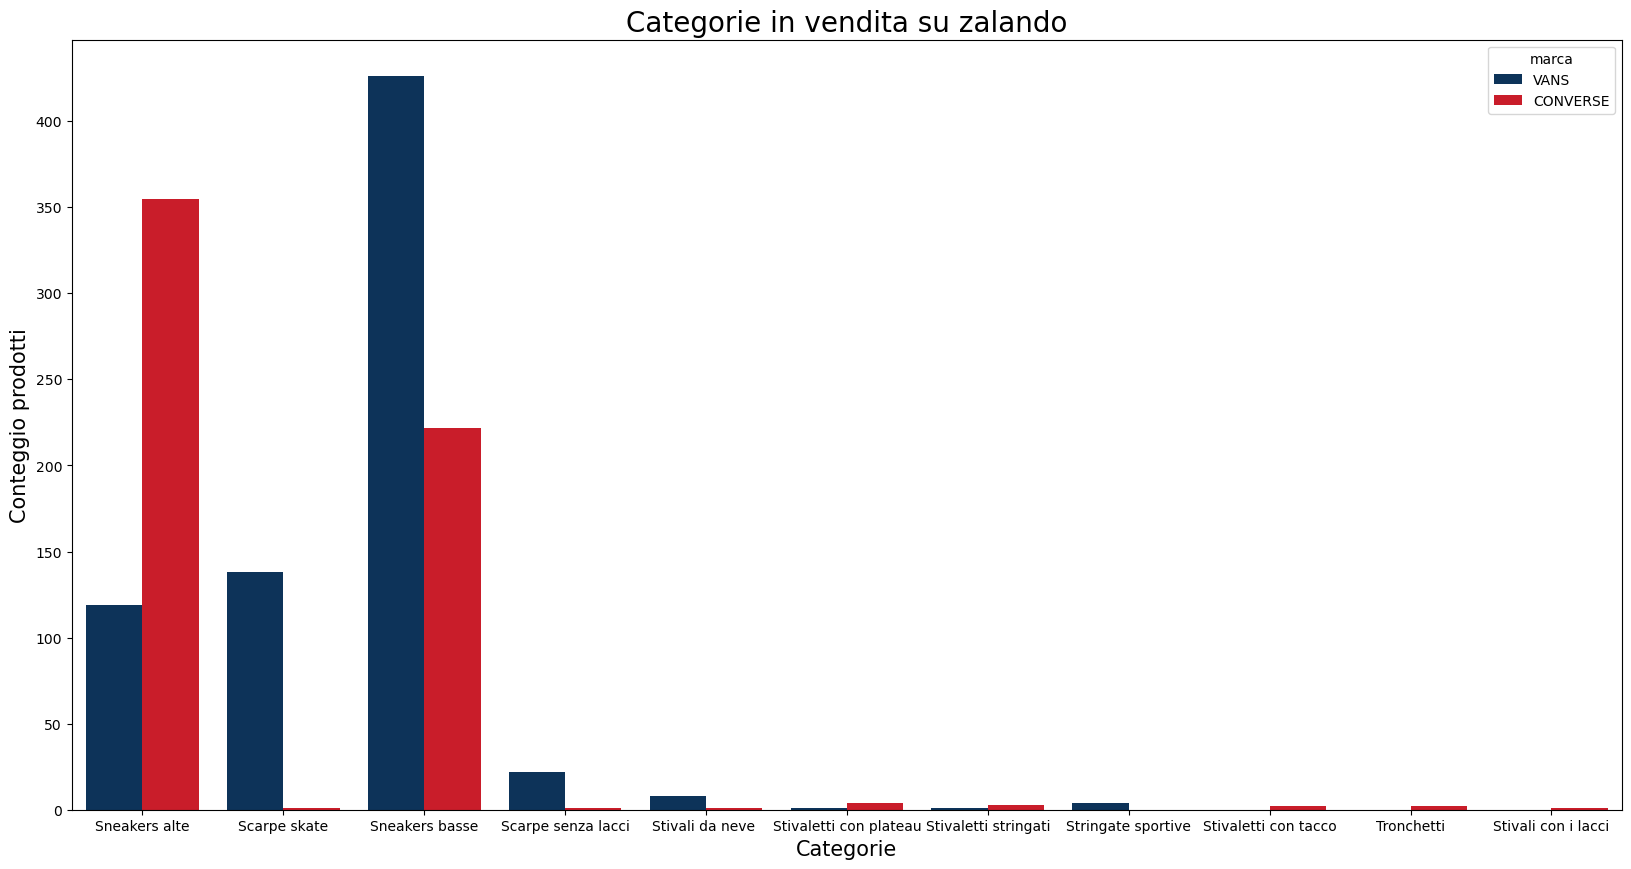

In [56]:
palette = ["#003366","#E60012"] 
plt.figure(figsize=(20,10))
sns.countplot(data = df_scarpe_new, x="categoria",hue= "marca",palette = palette)
plt.title("Categorie in vendita su zalando",fontsize = 20)
plt.xlabel("Categorie", fontsize = 15)
plt.ylabel("Conteggio prodotti", fontsize = 15)
Grafico_altre_categorie = input(f'inserisci il percorso per il salvataggio:')
os.makedirs(Grafico_altre_categorie, exist_ok=True)
plt.savefig(Grafico_altre_categorie + '/Categorie_marca.png', dpi=300, bbox_inches='tight')

inserisci il percrso per il salvataggio: C:\Users\ferro\Desktop\es. epicode\Modulo 3 PHYTON\bw12\GRAFICI


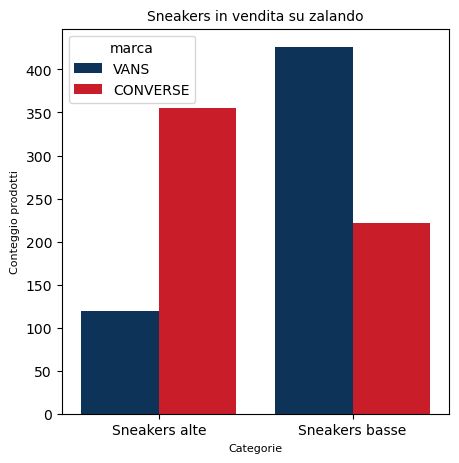

In [54]:
palette = ["#003366","#E60012"]
plt.figure(figsize=(5,5))
sns.countplot(data = df_sneakers, x="categoria",hue= "marca",palette = palette)
plt.title("Sneakers in vendita su zalando",fontsize = 10)
plt.xlabel("Categorie", fontsize = 8)
plt.ylabel("Conteggio prodotti", fontsize = 8)
Grafico_altre_ categorie = input(f'inserisci il percorso per il salvataggio:')
os.makedirs(Grafico_Sneakers, exist_ok=True)
plt.savefig(Grafico_Sneakers + '/Sneakers.png', dpi=300, bbox_inches='tight')

inserisci il percorso per il salvataggio: C:\Users\ferro\Desktop\es. epicode\Modulo 3 PHYTON\bw12\GRAFICI


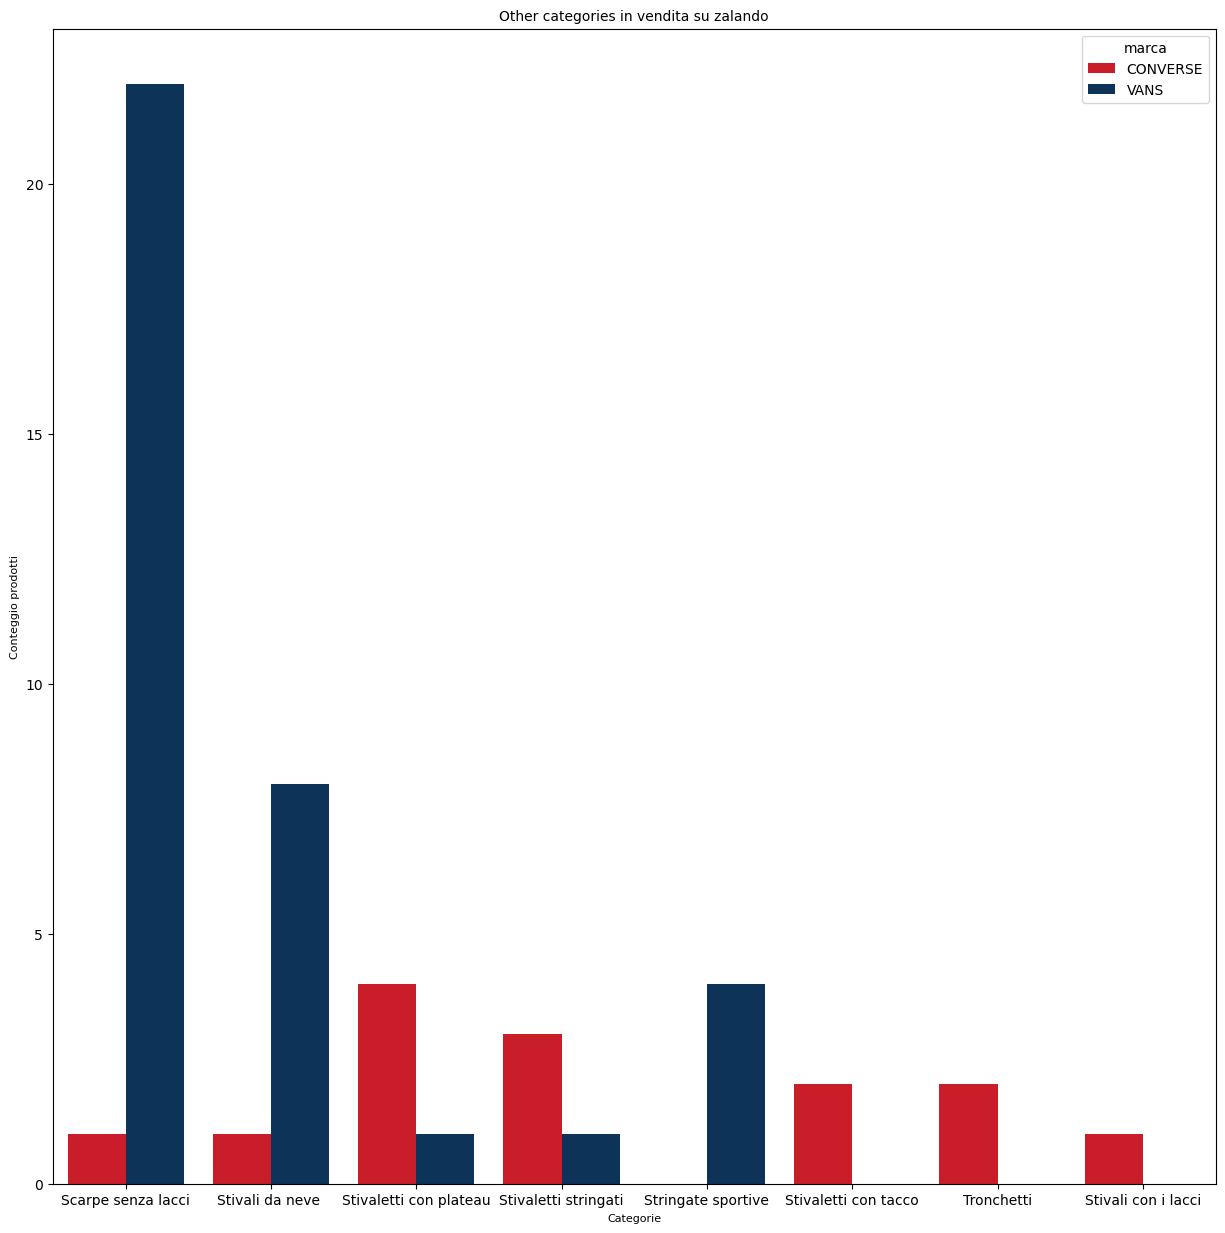

In [62]:
palette = ["#E60012","#003366"]  
plt.figure(figsize=(15,15))
sns.countplot(data = df_altre_categorie, x="categoria",hue= "marca", palette = palette)
plt.title("Other categories in vendita su zalando",fontsize = 10)
plt.xlabel("Categorie", fontsize = 8)
plt.ylabel("Conteggio prodotti", fontsize = 8)
Grafico_altre_categorie = input(f'inserisci il percorso per il salvataggio:')
os.makedirs(Grafico_altre_categorie, exist_ok=True)
plt.savefig(Grafico_altre_categorie + '/Altre_categorie.png', dpi=300, bbox_inches='tight')

inserisci il percorso per il salvataggio: C:\Users\ferro\Desktop\es. epicode\Modulo 3 PHYTON\bw12\GRAFICI


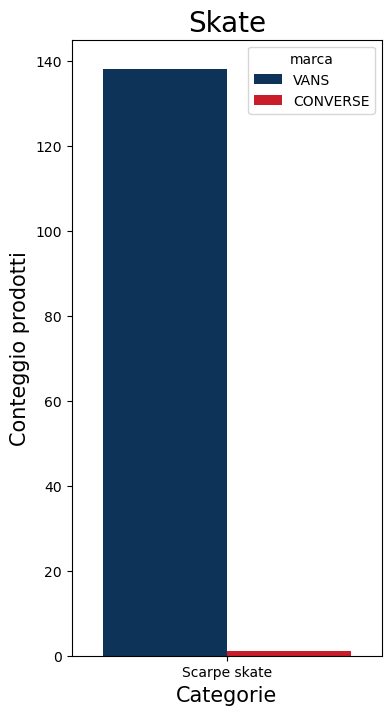

In [80]:
palette = ["#003366","#E60012"]   
plt.figure(figsize=(4,8))
sns.countplot(data = df_skate, x="categoria", hue = 'marca', palette = palette)
plt.title("Skate",fontsize = 20)
plt.xlabel("Categorie", fontsize = 15)
plt.ylabel("Conteggio prodotti", fontsize = 15)
Grafico_altre_categorie = input(f'inserisci il percorso per il salvataggio:')
os.makedirs(Grafico_altre_categorie, exist_ok=True)
plt.savefig(Grafico_altre_categorie + '/Skate.png', dpi=300, bbox_inches='tight')

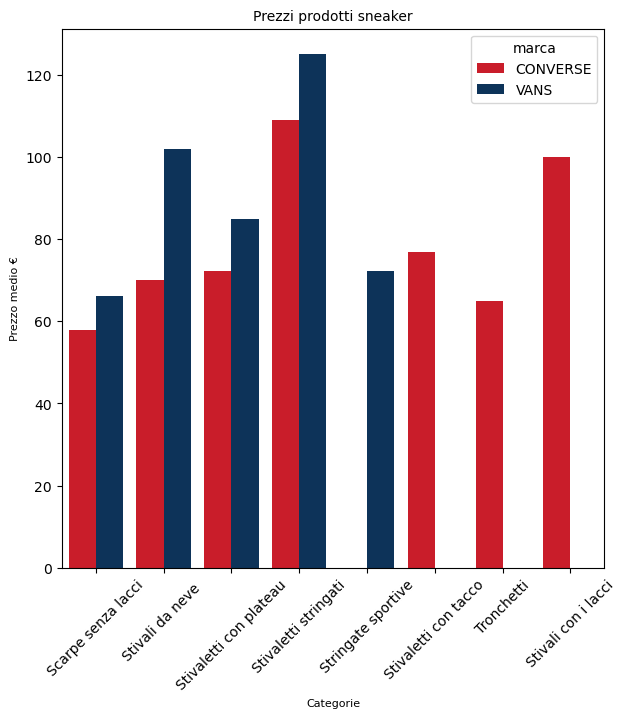

inserisci il percorso per il salvataggio: C:\Users\ferro\Desktop\es. epicode\Modulo 3 PHYTON\bw12\GRAFICI


<Figure size 640x480 with 0 Axes>

In [178]:
palette = ["#E60012","#003366"]
plt.figure(figsize=(7,7))
sns.barplot(data = df_altre_categorie, x="categoria", y="prezzo_effettivo", hue= "marca", palette = palette, errorbar =None )
plt.title("Prezzi prodotti sneaker",fontsize = 10)
plt.xlabel("Categorie", fontsize = 8)
plt.ylabel("Prezzo medio €", fontsize = 8)
plt.xticks(rotation = 45)
plt.show()
Grafico_altre_categorie = input(f'inserisci il percorso per il salvataggio:')
os.makedirs(Grafico_altre_categorie, exist_ok=True)
plt.savefig(Grafico_altre_categorie + '/prezzi_per_categorie.png', dpi=300, bbox_inches='tight')

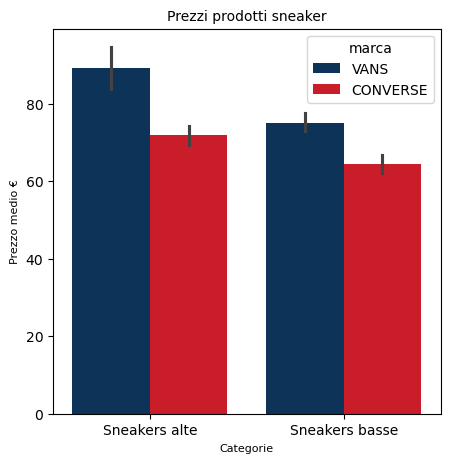

inserisci il percorso per il salvataggio: C:\Users\ferro\Desktop\es. epicode\Modulo 3 PHYTON\bw12\GRAFICI


<Figure size 640x480 with 0 Axes>

In [176]:
palette = ["#003366","#E60012"]
plt.figure(figsize=(5,5))
sns.barplot(data = df_sneakers, x="categoria", y="prezzo_effettivo", hue= "marca", palette = palette)
plt.title("Prezzi prodotti sneaker",fontsize = 10)
plt.xlabel("Categorie", fontsize = 8)
plt.ylabel("Prezzo medio €", fontsize = 8)
plt.show()
Grafico_altre_categorie = input(f'inserisci il percorso per il salvataggio:')
os.makedirs(Grafico_altre_categorie, exist_ok=True)
plt.savefig(Grafico_altre_categorie + '/prezzi_sneaker.png', dpi=300, bbox_inches='tight')

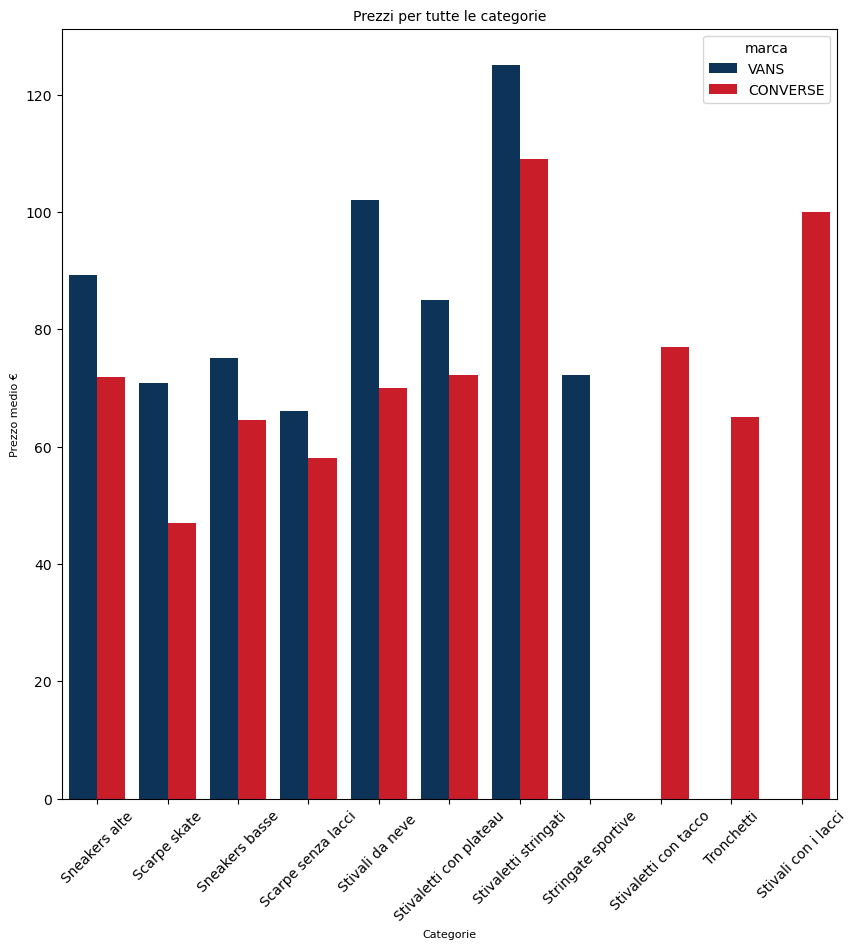

inserisci il percorso per il salvataggio: C:\Users\ferro\Desktop\es. epicode\Modulo 3 PHYTON\bw12\GRAFICI


<Figure size 640x480 with 0 Axes>

In [174]:
palette = ["#003366","#E60012"]
plt.figure(figsize=(10,10))
sns.barplot(data = df_scarpe_new, x="categoria", y="prezzo_effettivo", hue= "marca", palette = palette, errorbar = None)
plt.title("Prezzi per tutte le categorie",fontsize = 10)
plt.xlabel("Categorie", fontsize = 8)
plt.ylabel("Prezzo medio €", fontsize = 8)
plt.xticks(rotation = 45)
plt.show()
Grafico_altre_categorie = input(f'inserisci il percorso per il salvataggio:')
os.makedirs(Grafico_altre_categorie, exist_ok=True)
plt.savefig(Grafico_altre_categorie + '/prezzi_sneaker.png', dpi=300, bbox_inches='tight')

In [170]:
df_scarpe_new['categoria'].unique()

array(['Sneakers alte', None, 'Scarpe skate', 'Sneakers basse',
       'Scarpe senza lacci', 'Stivali da neve ', 'Stivaletti con plateau',
       'Stivaletti stringati', 'Stringate sportive',
       'Stivaletti con tacco', 'Tronchetti', 'Stivali con i lacci'],
      dtype=object)